In [19]:
import pandas as pd
import numpy as np
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
pd.options.display.float_format = '{:,.3f}'.format

pd.options.mode.chained_assignment = None
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid", font_scale = 1.5)
sns.set_context(rc={"lines.markersize": 10})

import matplotlib

import pickle as pkl
from matplotlib import pyplot as plt

new_plot_col=list(range(1800,2010,20))
from scipy.stats.stats import pearsonr
from scipy.stats.stats import pearsonr

from functools import reduce

In [21]:
features=pd.read_csv("../../Compounding/coha_compounds/features_CompoundAware_10_20_300.pkl", sep="\t")
features['compound_rating']=''
features.loc[features.compound_mean>=4,'compound_rating']='high'
features.loc[(features.compound_mean>=2) & (features.compound_mean<4),'compound_rating']='med'
features.loc[features.compound_mean<2,'compound_rating']='low'
features.compound_rating.value_counts()

high    18
med      6
low      6
Name: compound_rating, dtype: int64

In [22]:
features

,modifier,head,modifier_mean,modifier_std,head_mean,head_std,compound_mean,compound_std,1860_head_prod,1870_head_prod,...,1920_sim_with_modifier,1930_sim_with_modifier,1940_sim_with_modifier,1950_sim_with_modifier,1960_sim_with_modifier,1970_sim_with_modifier,1980_sim_with_modifier,1990_sim_with_modifier,2000_sim_with_modifier,compound_rating
0,web_noun,site_noun,2.679,1.691,3.933,1.181,3.786,1.206,0.000,0.000,...,0.044,0.010,0.003,0.025,0.003,0.014,0.013,0.637,0.479,med
1,video_noun,game_noun,4.500,0.719,5.000,0.000,4.600,0.611,0.000,0.000,...,0.044,0.010,0.003,0.025,0.003,0.014,0.313,0.289,0.398,high
2,radio_noun,station_noun,4.655,0.957,4.345,0.800,4.467,0.718,0.000,0.000,...,0.044,0.010,0.710,0.573,0.575,0.014,0.649,0.696,0.578,high
3,face_noun,value_noun,1.393,1.113,4.643,0.811,3.037,0.881,0.000,0.000,...,0.044,0.010,0.003,0.136,0.003,0.014,0.013,0.017,0.017,med
4,ground_noun,floor_noun,4.655,0.658,4.700,0.781,4.667,0.596,0.000,0.000,...,0.044,0.010,0.003,0.025,0.003,0.014,0.055,0.017,0.017,high
5,law_noun,firm_noun,4.724,0.518,3.893,1.496,4.400,0.757,0.000,0.000,...,0.044,0.010,0.003,0.667,0.003,0.577,0.665,0.635,0.555,high
6,lip_noun,service_noun,2.033,1.251,1.750,1.405,1.621,1.064,0.000,0.000,...,0.044,0.010,0.003,0.041,0.003,0.014,0.024,0.033,0.017,low
7,health_noun,insurance_noun,4.533,0.884,4.833,0.582,4.400,1.172,0.000,0.000,...,0.044,0.251,0.273,0.194,0.262,0.065,0.069,0.143,0.188,high
8,graduate_noun,student_noun,4.700,0.458,5.000,0.000,4.900,0.300,0.000,0.000,...,0.044,0.010,0.003,0.025,0.003,0.014,0.266,0.265,0.253,high
9,climate_noun,change_noun,4.897,0.305,4.828,0.378,4.966,0.182,0.000,0.000,...,0.044,0.010,0.003,0.025,0.003,0.014,0.013,0.060,0.040,high


In [23]:
to_add_cols=['compound_mean','compound_rating']
lmi_cols = [col for col in features.columns if 'local_mi' in col]
llr_cols = [col for col in features.columns if 'log_ratio' in col]
ppmi_cols = [col for col in features.columns if 'ppmi' in col]
sim_bw_constituents_cols = [col for col in features.columns if 'sim_bw_constituents' in col]
sim_with_head_cols = [col for col in features.columns if 'sim_with_head' in col]
sim_with_modifier_cols = [col for col in features.columns if 'sim_with_modifier' in col]
#selected_compounds=['health insurance','silver bullet','melting pot','gold mine','swimming pool','bank account']
#assert (len(lmi_cols)+len(llr_cols)+len(ppmi_cols)+len(sim_bw_constituents_cols)+len(sim_with_head_cols)+len(sim_with_modifier_cols))==(len(features.columns))

In [24]:
lmi_df=features.set_index(["modifier", "head"])[lmi_cols+to_add_cols]
#lmi_df=lmi_df.pct_change(axis='columns')*100
#lmi_df.columns=new_plot_col
lmi_df.reset_index(inplace=True)
lmi_df['compound']=lmi_df['modifier'].str[:-5]+' '+lmi_df['head'].str[:-5]
lmi_df.drop(['modifier','head'],axis=1,inplace=True)
#plot_lmi_df=plot_lmi_df.loc[plot_lmi_df['compound'].isin(selected_compounds)]
lmi_df.set_index('compound',inplace=True)
#plot_lmi_df=plot_lmi_df[plot_lmi_df.columns[10:]]
old_vars=[x.split('_')[0] for x in lmi_df.columns if 'compound' not in x]
lmi_df.columns=old_vars+to_add_cols
#plot_lmi_df.columns
#lmi_df.info()
lmi_df.reset_index(inplace=True)
plot_lmi_df=pd.melt(lmi_df,id_vars=['compound','compound_rating','compound_mean'],
                        value_vars=old_vars)
lmi_df

,compound,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,compound_mean,compound_rating
0,web site,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.992,0.992,3.786,med
1,video game,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.875,0.873,0.871,4.600,high
2,radio station,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.855,0.993,0.991,0.000,0.727,0.808,0.802,4.467,high
3,face value,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.993,0.000,0.000,0.000,0.000,0.000,3.037,med
4,ground floor,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.989,0.000,0.000,4.667,high
5,law firm,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.790,0.000,0.780,0.693,0.809,0.801,4.400,high
6,lip service,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.790,0.000,0.000,0.643,0.644,0.000,1.621,low
7,health insurance,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.777,0.779,0.667,0.640,0.652,0.632,0.554,0.804,4.400,high
8,graduate student,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.873,0.874,0.749,4.900,high
9,climate change,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.993,0.992,4.966,high


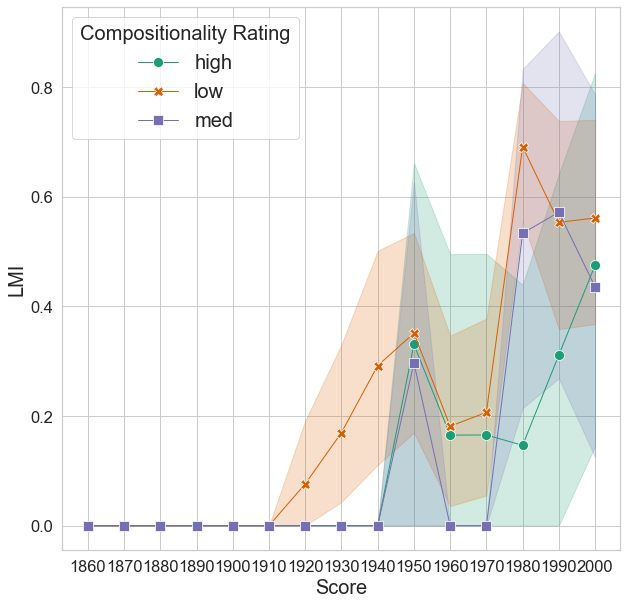

In [25]:
plt.figure(figsize=(10,10))
g=sns.lineplot(x="variable", y="value", hue="compound_rating",style="compound_rating",data=plot_lmi_df,palette="Dark2", marker='o',linewidth=1,dashes=False,markers=True)#,err_style="bars", ci=68)
g.set_xlabel("Score", fontsize=20)
g.set_ylabel("LMI", fontsize=20)
g.legend(title='Compositionality Rating', loc='upper left', labels=["high", "low", "med"], fontsize=20, title_fontsize=20)
#g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
#g.set_xlim(1799, 2000)
#plt.savefig('LMI_merged_new.png')

In [26]:
llr_df=features.set_index(["modifier", "head"])[llr_cols+to_add_cols]
#lmi_df=lmi_df.pct_change(axis='columns')*100
#lmi_df.columns=new_plot_col
llr_df.reset_index(inplace=True)
llr_df['compound']=llr_df['modifier'].str[:-5]+' '+llr_df['head'].str[:-5]
llr_df.drop(['modifier','head'],axis=1,inplace=True)
#plot_lmi_df=plot_lmi_df.loc[plot_lmi_df['compound'].isin(selected_compounds)]
llr_df.set_index('compound',inplace=True)
#plot_lmi_df=plot_lmi_df[plot_lmi_df.columns[10:]]
old_vars=[x.split('_')[0] for x in llr_df.columns if 'compound' not in x]
llr_df.columns=old_vars+to_add_cols
#plot_lmi_df.columns
#lmi_df.info()
llr_df.reset_index(inplace=True)
plot_llr_df=pd.melt(llr_df,id_vars=['compound','compound_rating','compound_mean'],
                        value_vars=old_vars)
llr_df.head()

,compound,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,compound_mean,compound_rating
0,web site,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.991,0.992,3.786,med
1,video game,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.793,0.790,0.786,4.600,high
2,radio station,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.764,0.993,0.990,0.000,0.638,0.718,0.710,4.467,high
3,face value,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.993,0.000,0.000,0.000,0.000,0.000,3.037,med
4,ground floor,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.988,0.000,0.000,4.667,high


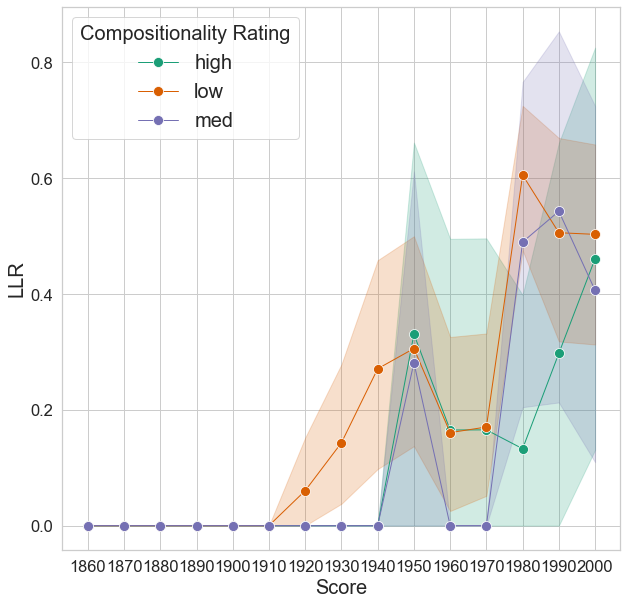

In [27]:
plt.figure(figsize=(10,10))
g=sns.lineplot(x="variable", y="value", hue="compound_rating",style="compound_rating",data=plot_llr_df,palette="Dark2", marker='o',linewidth=1,dashes=False)#,err_style="bars", ci=68)
g.set_xlabel("Score", fontsize=20)
g.set_ylabel("LLR", fontsize=20)
g.legend(title='Compositionality Rating', loc='upper left', labels=["high", "low", "med"], fontsize=20, title_fontsize=20)
#g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
#g.set_xlim(1799, 2000)
#plt.savefig('LLR_merged_new.png')

In [28]:
ppmi_df=features.set_index(["modifier", "head"])[ppmi_cols+to_add_cols]
#lmi_df=lmi_df.pct_change(axis='columns')*100
#lmi_df.columns=new_plot_col
ppmi_df.reset_index(inplace=True)
ppmi_df['compound']=ppmi_df['modifier'].str[:-5]+' '+ppmi_df['head'].str[:-5]
ppmi_df.drop(['modifier','head'],axis=1,inplace=True)
#plot_lmi_df=plot_lmi_df.loc[plot_lmi_df['compound'].isin(selected_compounds)]
ppmi_df.set_index('compound',inplace=True)
#plot_lmi_df=plot_lmi_df[plot_lmi_df.columns[10:]]
old_vars=[x.split('_')[0] for x in ppmi_df.columns if 'compound' not in x]
ppmi_df.columns=old_vars+to_add_cols
#plot_lmi_df.columns
#lmi_df.info()
ppmi_df.reset_index(inplace=True)
plot_ppmi_df=pd.melt(ppmi_df,id_vars=['compound','compound_rating','compound_mean'],
                        value_vars=old_vars)
ppmi_df.head()

,compound,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,compound_mean,compound_rating
0,web site,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,3.786,med
1,video game,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.884,0.882,0.878,4.600,high
2,radio station,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.862,0.999,1.000,0.000,0.730,0.813,0.807,4.467,high
3,face value,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.999,0.000,0.000,0.000,0.000,0.000,3.037,med
4,ground floor,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,4.667,high


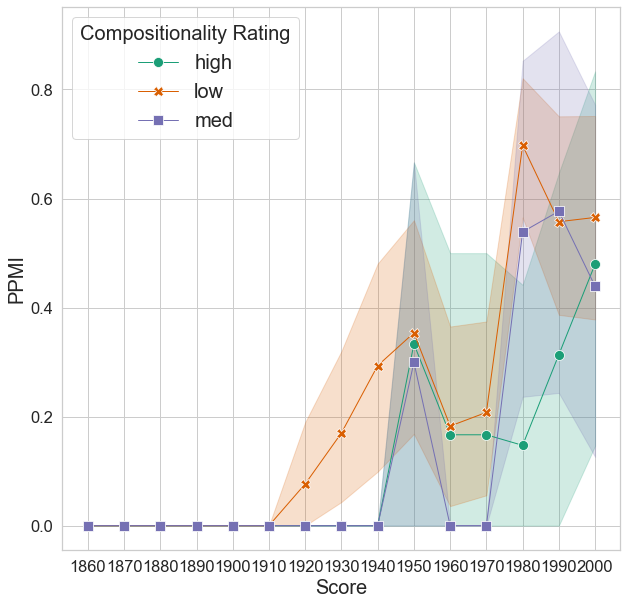

In [29]:
plt.figure(figsize=(10,10))
g=sns.lineplot(x="variable", y="value", hue="compound_rating",style="compound_rating",data=plot_ppmi_df,palette="Dark2", marker='o',linewidth=1,dashes=False,markers=True)#,err_style="bars", ci=68)
g.set_xlabel("Score", fontsize=20)
g.set_ylabel("PPMI", fontsize=20)
g.legend(title='Compositionality Rating', loc='upper left', labels=["high", "low", "med"], fontsize=20, title_fontsize=20)
#g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
#g.set_xlim(1799, 2000)
#plt.savefig('PPMI_merged_new.png')

In [30]:
sim_bw_constituents_df=features.set_index(["modifier", "head"])[sim_bw_constituents_cols+to_add_cols]
#lmi_df=lmi_df.pct_change(axis='columns')*100
#lmi_df.columns=new_plot_col
sim_bw_constituents_df.reset_index(inplace=True)
sim_bw_constituents_df['compound']=sim_bw_constituents_df['modifier'].str[:-5]+' '+sim_bw_constituents_df['head'].str[:-5]
sim_bw_constituents_df.drop(['modifier','head'],axis=1,inplace=True)
#plot_lmi_df=plot_lmi_df.loc[plot_lmi_df['compound'].isin(selected_compounds)]
sim_bw_constituents_df.set_index('compound',inplace=True)
#plot_lmi_df=plot_lmi_df[plot_lmi_df.columns[10:]]
old_vars=[x.split('_')[0] for x in sim_bw_constituents_df.columns if 'compound' not in x]
sim_bw_constituents_df.columns=old_vars+to_add_cols
#plot_lmi_df.columns
#lmi_df.info()
sim_bw_constituents_df.reset_index(inplace=True)
plot_sim_bw_constituents_df=pd.melt(sim_bw_constituents_df,id_vars=['compound','compound_rating','compound_mean'],
                        value_vars=old_vars)
sim_bw_constituents_df.head()

,compound,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,compound_mean,compound_rating
0,web site,0.005,0.001,0.000,0.001,0.002,0.000,0.005,0.041,0.024,0.011,0.037,0.045,0.057,0.125,0.100,3.786,med
1,video game,0.005,0.001,0.000,0.001,0.002,0.000,0.005,0.041,0.024,0.011,0.037,0.045,0.234,0.292,0.271,4.600,high
2,radio station,0.005,0.001,0.000,0.001,0.002,0.000,0.005,0.041,0.439,0.616,0.430,0.045,0.418,0.384,0.300,4.467,high
3,face value,0.005,0.001,0.000,0.001,0.002,0.000,0.005,0.041,0.024,0.013,0.037,0.045,0.057,0.053,0.029,3.037,med
4,ground floor,0.005,0.001,0.000,0.001,0.002,0.000,0.005,0.041,0.024,0.011,0.037,0.045,0.107,0.053,0.029,4.667,high


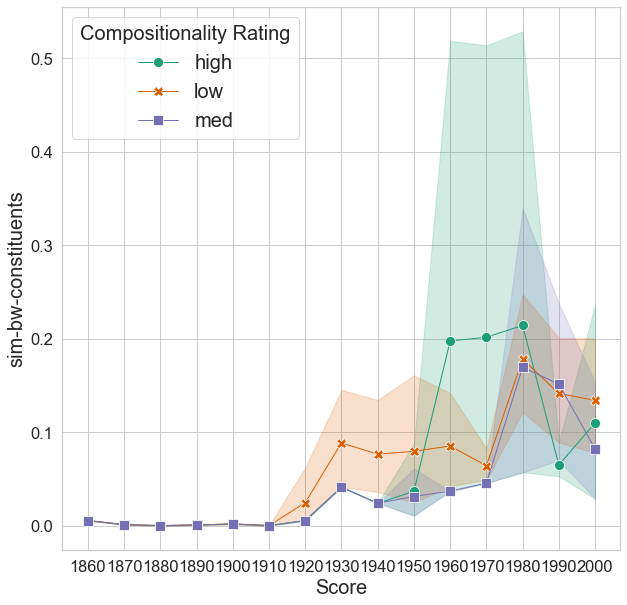

In [31]:
plt.figure(figsize=(10,10))
g=sns.lineplot(x="variable", y="value", hue="compound_rating",style="compound_rating",data=plot_sim_bw_constituents_df,palette="Dark2", marker='o',linewidth=1,dashes=False,markers=True)#,err_style="bars", ci=68)
g.set_xlabel("Score", fontsize=20)
g.set_ylabel("sim-bw-constituents", fontsize=20)
g.legend(title='Compositionality Rating', loc='upper left', labels=["high", "low", "med"], fontsize=20, title_fontsize=20)
#g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
#g.set_xlim(1799, 2000)
#plt.savefig('sim-bw-const_merged_new.png')

In [32]:
sim_with_head_df=features.set_index(["modifier", "head"])[sim_with_head_cols+to_add_cols]
#lmi_df=lmi_df.pct_change(axis='columns')*100
#lmi_df.columns=new_plot_col
sim_with_head_df.reset_index(inplace=True)
sim_with_head_df['compound']=sim_with_head_df['modifier'].str[:-5]+' '+sim_with_head_df['head'].str[:-5]
sim_with_head_df.drop(['modifier','head'],axis=1,inplace=True)
#plot_lmi_df=plot_lmi_df.loc[plot_lmi_df['compound'].isin(selected_compounds)]
sim_with_head_df.set_index('compound',inplace=True)
#plot_lmi_df=plot_lmi_df[plot_lmi_df.columns[10:]]
old_vars=[x.split('_')[0] for x in sim_with_head_df.columns if 'compound' not in x]
sim_with_head_df.columns=old_vars+to_add_cols
#plot_lmi_df.columns
#lmi_df.info()
sim_with_head_df.reset_index(inplace=True)
plot_sim_with_head_df=pd.melt(sim_with_head_df,id_vars=['compound','compound_rating','compound_mean'],
                        value_vars=old_vars)
sim_with_head_df.head()

,compound,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,compound_mean,compound_rating
0,web site,0.007,0.001,0.002,0.024,0.049,0.030,0.038,0.018,0.031,0.052,0.026,0.018,0.036,0.442,0.598,3.786,med
1,video game,0.007,0.001,0.002,0.024,0.049,0.030,0.038,0.018,0.031,0.052,0.026,0.018,0.390,0.368,0.491,4.600,high
2,radio station,0.007,0.001,0.002,0.024,0.049,0.030,0.038,0.018,0.561,0.697,0.692,0.018,0.453,0.624,0.605,4.467,high
3,face value,0.007,0.001,0.002,0.024,0.049,0.030,0.038,0.018,0.031,0.041,0.026,0.018,0.036,0.030,0.018,3.037,med
4,ground floor,0.007,0.001,0.002,0.024,0.049,0.030,0.038,0.018,0.031,0.052,0.026,0.018,0.216,0.030,0.018,4.667,high


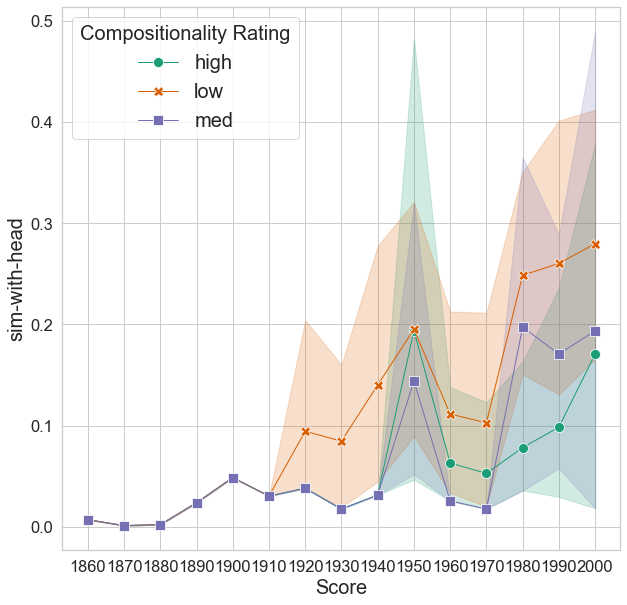

In [33]:
plt.figure(figsize=(10,10))
g=sns.lineplot(x="variable", y="value", hue="compound_rating",style="compound_rating",data=plot_sim_with_head_df,palette="Dark2", marker='o',linewidth=1,dashes=False,markers=True)#,err_style="bars", ci=68)
g.set_xlabel("Score", fontsize=20)
g.set_ylabel("sim-with-head", fontsize=20)
g.legend(title='Compositionality Rating', loc='upper left', labels=["high", "low", "med"], fontsize=20, title_fontsize=20)
#g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
#g.set_xlim(1799, 2000)
#plt.savefig('sim-with-head_merged_new.png')

In [34]:
sim_with_modifier_df=features.set_index(["modifier", "head"])[sim_with_modifier_cols+to_add_cols]
#lmi_df=lmi_df.pct_change(axis='columns')*100
#lmi_df.columns=new_plot_col
sim_with_modifier_df.reset_index(inplace=True)
sim_with_modifier_df['compound']=sim_with_modifier_df['modifier'].str[:-5]+' '+sim_with_modifier_df['head'].str[:-5]
sim_with_modifier_df.drop(['modifier','head'],axis=1,inplace=True)
#plot_lmi_df=plot_lmi_df.loc[plot_lmi_df['compound'].isin(selected_compounds)]
sim_with_modifier_df.set_index('compound',inplace=True)
#plot_lmi_df=plot_lmi_df[plot_lmi_df.columns[10:]]
old_vars=[x.split('_')[0] for x in sim_with_modifier_df.columns if 'compound' not in x]
sim_with_modifier_df.columns=old_vars+to_add_cols
#plot_lmi_df.columns
#lmi_df.info()
sim_with_modifier_df.reset_index(inplace=True)
plot_sim_with_modifier_df=pd.melt(sim_with_modifier_df,id_vars=['compound','compound_rating','compound_mean'],
                        value_vars=old_vars)
sim_with_modifier_df.head()

,compound,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,compound_mean,compound_rating
0,web site,0.000,0.001,0.044,0.000,0.000,0.000,0.044,0.010,0.003,0.025,0.003,0.014,0.013,0.637,0.479,3.786,med
1,video game,0.000,0.001,0.044,0.000,0.000,0.000,0.044,0.010,0.003,0.025,0.003,0.014,0.313,0.289,0.398,4.600,high
2,radio station,0.000,0.001,0.044,0.000,0.000,0.000,0.044,0.010,0.710,0.573,0.575,0.014,0.649,0.696,0.578,4.467,high
3,face value,0.000,0.001,0.044,0.000,0.000,0.000,0.044,0.010,0.003,0.136,0.003,0.014,0.013,0.017,0.017,3.037,med
4,ground floor,0.000,0.001,0.044,0.000,0.000,0.000,0.044,0.010,0.003,0.025,0.003,0.014,0.055,0.017,0.017,4.667,high


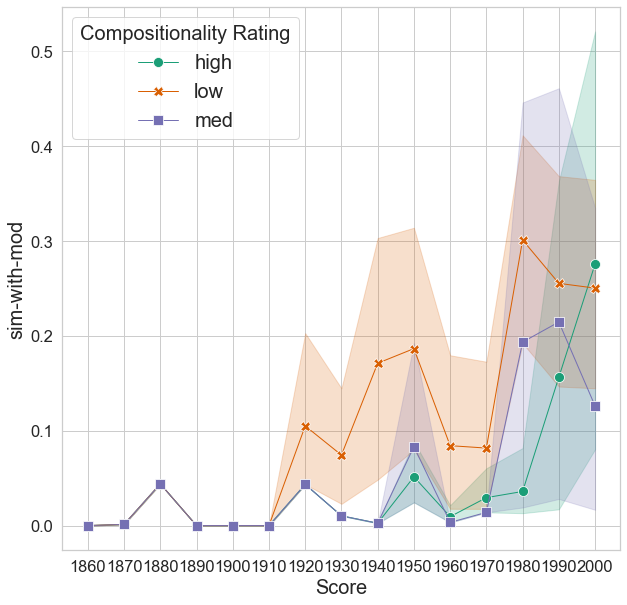

In [35]:
plt.figure(figsize=(10,10))
g=sns.lineplot(x="variable", y="value", hue="compound_rating",style="compound_rating",data=plot_sim_with_modifier_df,palette="Dark2", marker='o',linewidth=1,dashes=False,markers=True)#,err_style="bars", ci=68)
g.set_xlabel("Score", fontsize=20)
g.set_ylabel("sim-with-mod", fontsize=20)
g.legend(title='Compositionality Rating', loc='upper left', labels=["high", "low", "med"], fontsize=20, title_fontsize=20)
#g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
#g.set_xlim(1799, 2000)
#plt.savefig('sim-with-mod_merged_new.png')

In [37]:
compounds=pd.read_pickle("../../Compounding/coha_compounds/compounds_CompoundAware_20_20_300.pkl")
compounds.head()

common     0     1     2  \
modifier     head       time                                              
academy_noun award_noun 1980  academy_noun award_noun 0.288 0.035 0.342   
                        2000  academy_noun award_noun 0.379 0.039 0.532   
acid_noun    gas_noun   1860       acid_noun gas_noun 0.369 0.036 0.531   
                        1900       acid_noun gas_noun 0.370 0.037 0.534   
             rain_noun  1980      acid_noun rain_noun 0.374 0.037 0.539   

                                  3      4      5      6     7      8  ...  \
modifier     head       time                                           ...   
academy_noun award_noun 1980 -0.064 -0.268 -0.012 -0.026 0.056 -0.269  ...   
                        2000 -0.098 -0.395 -0.010 -0.021 0.099 -0.405  ...   
acid_noun    gas_noun   1860 -0.098 -0.386 -0.009 -0.021 0.102 -0.407  ...   
                        1900 -0.099 -0.388 -0.008 -0.020 0.103 -0.408  ...   
             rain_noun  1980 -0.100 -0.397 -0.009 -0.022 0.107 -0.402  ...   

                                290    291    292    293    294    295   296  \
modifier     head       time                                                   
academy_noun award_noun 1980 -0.056 -0.058 -0.063 -0.029 -0.008 -0.114 0.067   
                        2000 -0.011 -0.020 -0.018 -0.012  0.007 -0.027 0.026   
acid_noun    gas_noun   1860  0.024  0.005  0.000 -0.007  0.004  0.002 0.020   
                        1900  0.005 -0.001 -0.004 -0.013 -0.006 -0.008 0.010   
             rain_noun  1980 -0.007 -0.014 -0.014 -0.003 -0.010 -0.002 0.017   

                                297    298    299  
modifier     head       time                       
academy_noun award_noun 1980  0.004 -0.098  0.066  
                        2000  0.010 -0.024  0.011  
acid_noun    gas_noun   1860 -0.012  0.012 -0.024  
                        1900 -0.014  0.001 -0.008  
             rain_noun  1980  0.009  0.007 -0.005  

[5 rows x 301 columns]

In [38]:
merge_df_aware=features[['modifier','head','compound_rating']].merge(compounds.drop(['common'],axis=1).reset_index(),on=['modifier','head'],how='inner')
merge_df_aware.set_index(["modifier", "head",'time','compound_rating'], inplace = True)
merge_df_aware.head()

0      1     2      3      4    \
modifier   head         time compound_rating                                    
web_noun   site_noun    1980 med             0.390  0.036 0.556 -0.104 -0.414   
                        2000 med             0.377  0.036 0.540 -0.100 -0.402   
video_noun game_noun    1980 high            0.341  0.032 0.488 -0.089 -0.362   
                        2000 high            0.504 -0.032 0.457 -0.087 -0.362   
radio_noun station_noun 1920 high            0.282  0.022 0.409 -0.077 -0.306   

                                                5      6     7      8    \
modifier   head         time compound_rating                              
web_noun   site_noun    1980 med             -0.011 -0.026 0.112 -0.417   
                        2000 med             -0.010 -0.026 0.109 -0.402   
video_noun game_noun    1980 high            -0.012 -0.022 0.090 -0.380   
                        2000 high            -0.010 -0.024 0.091 -0.391   
radio_noun station_noun 1920 high            -0.013 -0.006 0.087 -0.280   

                                                9    ...    290    291    292  \
modifier   head         time compound_rating         ...                        
web_noun   site_noun    1980 med              0.007  ...  0.004  0.009 -0.004   
                        2000 med              0.001  ...  0.007 -0.003  0.022   
video_noun game_noun    1980 high            -0.002  ... -0.029 -0.001 -0.038   
                        2000 high            -0.000  ... -0.001 -0.042  0.011   
radio_noun station_noun 1920 high            -0.001  ... -0.018 -0.066  0.007   

                                                293    294    295    296  \
modifier   head         time compound_rating                               
web_noun   site_noun    1980 med              0.003 -0.014 -0.009  0.006   
                        2000 med             -0.015 -0.009 -0.007  0.007   
video_noun game_noun    1980 high             0.004 -0.000 -0.030  0.011   
                        2000 high            -0.019 -0.017 -0.035  0.014   
radio_noun station_noun 1920 high             0.039  0.018  0.012 -0.013   

                                                297    298    299  
modifier   head         time compound_rating                       
web_noun   site_noun    1980 med             -0.009 -0.000  0.003  
                        2000 med             -0.030 -0.004 -0.000  
video_noun game_noun    1980 high             0.015 -0.025  0.035  
                        2000 high             0.069 -0.069  0.023  
radio_noun station_noun 1920 high            -0.016  0.044 -0.001  

[5 rows x 300 columns]

In [39]:
def cosine(row1,row2):
    if row1.name[:-2]!=row2.name[:-2]:
        return np.nan
    else:
        denom1=np.sqrt(np.sum(np.square(row1)))
        denom2=np.sqrt(np.sum(np.square(row2)))
        num=np.sum(row1*row2)
        return num/(denom1*denom2)

In [40]:
cosine(merge_df_aware.iloc[2-1],merge_df_aware.iloc[2])

nan

In [41]:
cosine_compound_agnostic=[np.nan]
for i in range(1,merge_df_aware.shape[0]):
    cosine_compound_agnostic.append(cosine(merge_df_aware.iloc[i-1],merge_df_aware.iloc[i]))

In [42]:
merge_df_aware['compound_cosine']=cosine_compound_agnostic
compound_df=pd.pivot_table(merge_df_aware.reset_index(), values = 'compound_cosine', index=['modifier','head','compound_rating'], columns = 'time')
compound_df

,,time,1920,1940,1960,1980,2000
modifier,head,compound_rating,,,,,
academy_noun,award_noun,med,nan,nan,nan,nan,0.727
birth_noun,rate_noun,high,0.685,0.909,0.934,nan,nan
box_noun,office_noun,low,nan,nan,0.964,0.951,0.909
brick_noun,wall_noun,med,nan,0.891,0.945,0.868,nan
case_noun,study_noun,med,nan,nan,nan,nan,0.929
climate_noun,change_noun,high,nan,nan,nan,nan,0.939
credit_noun,card_noun,high,nan,nan,nan,nan,0.896
face_noun,value_noun,med,nan,0.769,nan,0.834,nan
fairy_noun,tale_noun,low,nan,0.859,nan,0.914,0.907


In [33]:
compound_df

time,compound_rating,1820,1840,1860,1880,1900,1920,1940,1960,1980,2000,compound
0,med,nan,nan,nan,nan,nan,nan,0.814,0.929,0.983,0.999,academy award
1,low,nan,nan,nan,nan,0.921,0.392,1.000,0.841,0.760,0.982,acid test
2,high,nan,nan,nan,nan,0.959,0.982,0.985,0.991,0.970,0.988,application form
3,med,nan,0.669,0.961,0.964,0.970,0.980,0.995,0.982,0.982,0.997,balance sheet
4,low,nan,nan,nan,nan,nan,nan,nan,nan,0.767,0.534,banana republic
...,...,...,...,...,...,...,...,...,...,...,...,...
167,high,nan,nan,1.000,0.991,0.783,0.929,0.964,0.983,0.979,0.994,wedding anniversary
168,high,0.988,0.994,0.997,0.997,0.996,0.998,0.999,0.999,0.997,0.999,wedding day
169,high,0.961,0.936,0.972,0.949,0.985,0.978,0.992,0.990,0.998,0.998,winter solstice
170,low,nan,nan,nan,nan,0.647,0.860,nan,nan,nan,0.988,word painting


In [43]:
compound_df.reset_index(inplace=True)
compound_df['compound']=compound_df['modifier'].str[:-5]+' '+compound_df['head'].str[:-5]
compound_df.drop(['modifier','head'],axis=1,inplace=True)
#plot_compound_df=plot_compound_df.loc[plot_compound_df['compound'].isin(selected_compounds)]
#compound_df.set_index('compound',inplace=True)
#plot_compound_df=plot_compound_df[plot_compound_df.columns[10:]]
plot_compound_df=pd.melt(compound_df,id_vars=['compound','compound_rating'],
                        value_vars=list(range(1820,2009,20)))
plot_compound_df

KeyError: "The following 'value_vars' are not present in the DataFrame: [1820, 1840, 1860, 1880, 1900]"

In [44]:
plt.figure(figsize=(15,15))
g=sns.lineplot(x="time", y="value", hue="compound_rating",style="compound_rating",data=plot_compound_df,palette="Dark2",linewidth=1,dashes=False)#,err_style="bars", ci=68)
g.set_xlabel("Time", fontsize=20)
g.set_ylabel("Compound", fontsize=20)
#g.legend(title='Compound Rating', loc='upper left', labels=["high", "low", "med"], fontsize=20, title_fontsize=20)
#g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
g.set_xlim(1900, 2009)

NameError: name 'plot_compound_df' is not defined

<Figure size 1080x1080 with 0 Axes>

In [24]:
heads=pd.read_pickle("../../datasets/constituents_CompoundAgnostic_20_20_300.pkl")
heads.index.set_names('head',level=0,inplace=True)
heads.head()


0      1     2      3     4      5     6     7     8     9    \
head   time                                                                  
a_noun 1800 0.718 -0.287 0.089 -0.032 0.144 -0.108 0.150 0.241 0.055 0.180   
       1820 0.732 -0.286 0.078 -0.030 0.133 -0.118 0.149 0.232 0.057 0.182   
       1840 0.744 -0.290 0.084 -0.032 0.150 -0.107 0.140 0.215 0.065 0.183   
       1860 0.748 -0.306 0.121 -0.039 0.185 -0.096 0.125 0.189 0.066 0.173   
       1880 0.754 -0.322 0.155 -0.046 0.222 -0.088 0.115 0.170 0.061 0.159   

             ...    290    291    292    293   294    295   296   297   298  \
head   time  ...                                                              
a_noun 1800  ... -0.017  0.000 -0.016 -0.005 0.001 -0.006 0.008 0.012 0.013   
       1820  ... -0.015 -0.001 -0.013 -0.005 0.001 -0.003 0.007 0.010 0.012   
       1840  ... -0.011 -0.004 -0.010 -0.001 0.004 -0.002 0.005 0.009 0.011   
       1860  ... -0.006 -0.003 -0.006  0.001 0.004  0.000 0.004 0.008 0.007   
       1880  ... -0.004 -0.000 -0.004  0.002 0.004  0.001 0.004 0.006 0.006   

              299  
head   time        
a_noun 1800 0.017  
       1820 0.018  
       1840 0.016  
       1860 0.012  
       1880 0.008  

[5 rows x 300 columns]

In [25]:
merge_df_aware_heads=features[['modifier','head']].merge(heads.reset_index(),on=['head'],how='inner')
merge_df_aware_heads.set_index(["modifier", "head",'time'], inplace = True)
merge_df_aware_heads.head()

0      1      2      3      4     5      6      7    \
modifier head      time                                                         
end_noun user_noun 1800 0.033 -0.008 -0.007 -0.001  0.001 0.003 -0.006 -0.019   
                   1820 0.033 -0.006 -0.012 -0.005 -0.000 0.004 -0.012 -0.022   
                   1840 0.036 -0.007 -0.006 -0.005 -0.004 0.003 -0.013 -0.022   
                   1860 0.115 -0.047  0.036  0.006 -0.004 0.005 -0.002 -0.022   
                   1880 0.180 -0.085  0.081 -0.002 -0.014 0.001 -0.010 -0.025   

                          8     9    ...   290    291   292   293    294  \
modifier head      time              ...                                   
end_noun user_noun 1800 0.054 0.044  ... 0.026 -0.077 0.083 0.050 -0.035   
                   1820 0.035 0.049  ... 0.044 -0.079 0.095 0.050 -0.021   
                   1840 0.033 0.052  ... 0.047 -0.077 0.097 0.048 -0.018   
                   1860 0.026 0.002  ... 0.033 -0.068 0.081 0.021 -0.042   
                   1880 0.031 0.030  ... 0.030 -0.062 0.080 0.038 -0.031   

                           295    296   297   298   299  
modifier head      time                                  
end_noun user_noun 1800 -0.046  0.039 0.277 0.023 0.108  
                   1820 -0.022  0.018 0.277 0.021 0.099  
                   1840 -0.017  0.014 0.275 0.023 0.099  
                   1860 -0.067 -0.017 0.251 0.024 0.095  
                   1880 -0.046 -0.001 0.250 0.040 0.094  

[5 rows x 300 columns]

In [26]:
cosine_head_agnostic=[np.nan]
for i in range(1,merge_df_aware_heads.shape[0]):
    cosine_head_agnostic.append(cosine(merge_df_aware_heads.iloc[i-1],merge_df_aware_heads.iloc[i]))


In [27]:
merge_df_aware_heads['head_cosine']=cosine_head_agnostic
head_df=pd.pivot_table(merge_df_aware_heads.reset_index(), values = 'head_cosine', index=['modifier','head'], columns = 'time')
head_df.drop([1800],axis=1,inplace=True)
head_df

time                               1820  1840  1860  1880  1900  1920  1940  \
modifier         head                                                         
academy_noun     award_noun       0.992 0.987 0.992 0.994 0.996 0.993 0.971   
acid_noun        test_noun        0.985 0.976 0.979 0.973 0.990 0.991 0.998   
agony_noun       aunt_noun        0.994 0.990 0.982 0.995 0.995 0.992 0.994   
application_noun form_noun        0.995 0.994 0.990 0.996 0.997 0.996 0.998   
balance_noun     sheet_noun       0.979 0.987 0.984 0.992 0.926 0.961 0.998   
...                                 ...   ...   ...   ...   ...   ...   ...   
wedding_noun     anniversary_noun 0.949 0.984 0.989 0.963 0.982 0.979 0.983   
                 day_noun         0.998 0.999 0.997 0.998 0.998 0.998 0.998   
winter_noun      solstice_noun    0.923 0.925 0.965 0.939 0.980 0.953 0.945   
word_noun        painting_noun    0.997 0.994 0.995 0.998 0.996 0.998 0.998   
world_noun       conference_noun  0.993 0.921 0.993 0.993 0.958 0.917 0.967   

time                               1960  1980  2000  
modifier         head                                
academy_noun     award_noun       0.957 0.941 0.995  
acid_noun        test_noun        0.997 0.998 1.000  
agony_noun       aunt_noun        0.996 0.996 0.997  
application_noun form_noun        0.997 0.997 0.972  
balance_noun     sheet_noun       0.999 0.998 0.999  
...                                 ...   ...   ...  
wedding_noun     anniversary_noun 0.962 0.969 0.989  
                 day_noun         0.998 0.996 0.997  
winter_noun      solstice_noun    0.955 0.931 0.965  
word_noun        painting_noun    0.998 0.999 0.999  
world_noun       conference_noun  0.937 0.914 0.968  

[178 rows x 10 columns]

In [28]:
plot_head_df=head_df.reset_index()
plot_head_df['compound']=plot_head_df['modifier'].str[:-5]+' '+plot_head_df['head'].str[:-5]
plot_head_df.drop(['modifier','head'],axis=1,inplace=True)
plot_head_df.set_index('compound',inplace=True)
plot_head_df

time,1820,1840,1860,1880,1900,1920,1940,1960,1980,2000
compound,,,,,,,,,,
academy award,0.992,0.987,0.992,0.994,0.996,0.993,0.971,0.957,0.941,0.995
acid test,0.985,0.976,0.979,0.973,0.990,0.991,0.998,0.997,0.998,1.000
agony aunt,0.994,0.990,0.982,0.995,0.995,0.992,0.994,0.996,0.996,0.997
application form,0.995,0.994,0.990,0.996,0.997,0.996,0.998,0.997,0.997,0.972
balance sheet,0.979,0.987,0.984,0.992,0.926,0.961,0.998,0.999,0.998,0.999
...,...,...,...,...,...,...,...,...,...,...
wedding anniversary,0.949,0.984,0.989,0.963,0.982,0.979,0.983,0.962,0.969,0.989
wedding day,0.998,0.999,0.997,0.998,0.998,0.998,0.998,0.998,0.996,0.997
winter solstice,0.923,0.925,0.965,0.939,0.980,0.953,0.945,0.955,0.931,0.965


In [29]:
compound_df

time,compound_rating,1820,1840,1860,1880,1900,1920,1940,1960,1980,2000,compound
0,med,nan,nan,nan,nan,nan,nan,0.814,0.929,0.983,0.999,academy award
1,low,nan,nan,nan,nan,0.921,0.392,1.000,0.841,0.760,0.982,acid test
2,high,nan,nan,nan,nan,0.959,0.982,0.985,0.991,0.970,0.988,application form
3,med,nan,0.669,0.961,0.964,0.970,0.980,0.995,0.982,0.982,0.997,balance sheet
4,low,nan,nan,nan,nan,nan,nan,nan,nan,0.767,0.534,banana republic
...,...,...,...,...,...,...,...,...,...,...,...,...
167,high,nan,nan,1.000,0.991,0.783,0.929,0.964,0.983,0.979,0.994,wedding anniversary
168,high,0.988,0.994,0.997,0.997,0.996,0.998,0.999,0.999,0.997,0.999,wedding day
169,high,0.961,0.936,0.972,0.949,0.985,0.978,0.992,0.990,0.998,0.998,winter solstice
170,low,nan,nan,nan,nan,0.647,0.860,nan,nan,nan,0.988,word painting


In [30]:
plt.figure(figsize=(10,10))
for i in range(0,compound_df.drop(['time','compound_rating'],axis=1).shape[0]):
    
    plt.figure()
    g=sns.lineplot(data=compound_df.iloc[i].to_frame(), palette="Paired", marker='o',linewidth=1,dashes=False)
    g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
    g.legend(title=compound_df.iloc[i].name, title_fontsize=20)

#g.set(ylim=(-150, 150))

KeyError: "['time'] not found in axis"

<Figure size 720x720 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,10))
g=sns.lineplot(data=plot_lmi_df.sample(n=10,random_state=1001).transpose(), palette="Paired", marker='o',linewidth=1,dashes=False)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
#g.set(ylim=(-150, 150))